In [852]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [853]:
df = pd.read_csv("/content/EICHERMOT.NS.csv")

In [854]:
df

,Data,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,3039.995117,3042.000000,2985.000000,2989.314941,2674.030518,198470
1,2018-01-02,2992.500000,2995.500000,2853.969971,2867.014893,2564.629883,847930
2,2018-01-03,2885.000000,2904.500000,2854.215088,2881.435059,2577.529053,470880
3,2018-01-04,2882.570068,2895.760010,2841.500000,2857.074951,2555.737793,494210
4,2018-01-05,2879.699951,2932.500000,2868.620117,2923.699951,2615.336182,527770
...,...,...,...,...,...,...,...
1231,2022-12-26,3115.000000,3228.649902,3088.199951,3161.250000,3161.250000,530294
1232,2022-12-27,3174.949951,3213.149902,3150.000000,3201.800049,3201.800049,422130
1233,2022-12-28,3188.149902,3233.600098,3175.600098,3211.550049,3211.550049,318724
1234,2022-12-29,3181.050049,3490.750000,3163.250000,3281.199951,3281.199951,881072


In [855]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Data       1236 non-null   object 
 1   Open       1236 non-null   float64
 2   High       1236 non-null   float64
 3   Low        1236 non-null   float64
 4   Close      1236 non-null   float64
 5   Adj Close  1236 non-null   float64
 6   Volume     1236 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [856]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1.236000e+03
mean,2465.389064,2501.015158,2427.662037,2462.519349,2366.282602,1.188739e+06
std,511.080984,513.098385,507.787337,510.165322,514.526964,9.845454e+05
min,1296.619995,1309.989990,1245.010010,1268.005005,1251.827637,5.241000e+04
25%,2102.647461,2129.849976,2069.125000,2097.393676,1972.959778,5.378810e+05
50%,2521.449951,2550.047607,2472.094971,2509.974976,2446.265380,9.156590e+05
75%,2792.423828,2830.025024,2756.162476,2794.622559,2665.759460,1.501995e+06
max,3889.649902,3889.649902,3758.000000,3850.449951,3850.449951,1.149130e+07


In [858]:
df.Data	= pd.to_datetime(df.Data)
df2 =df.set_index('Data')

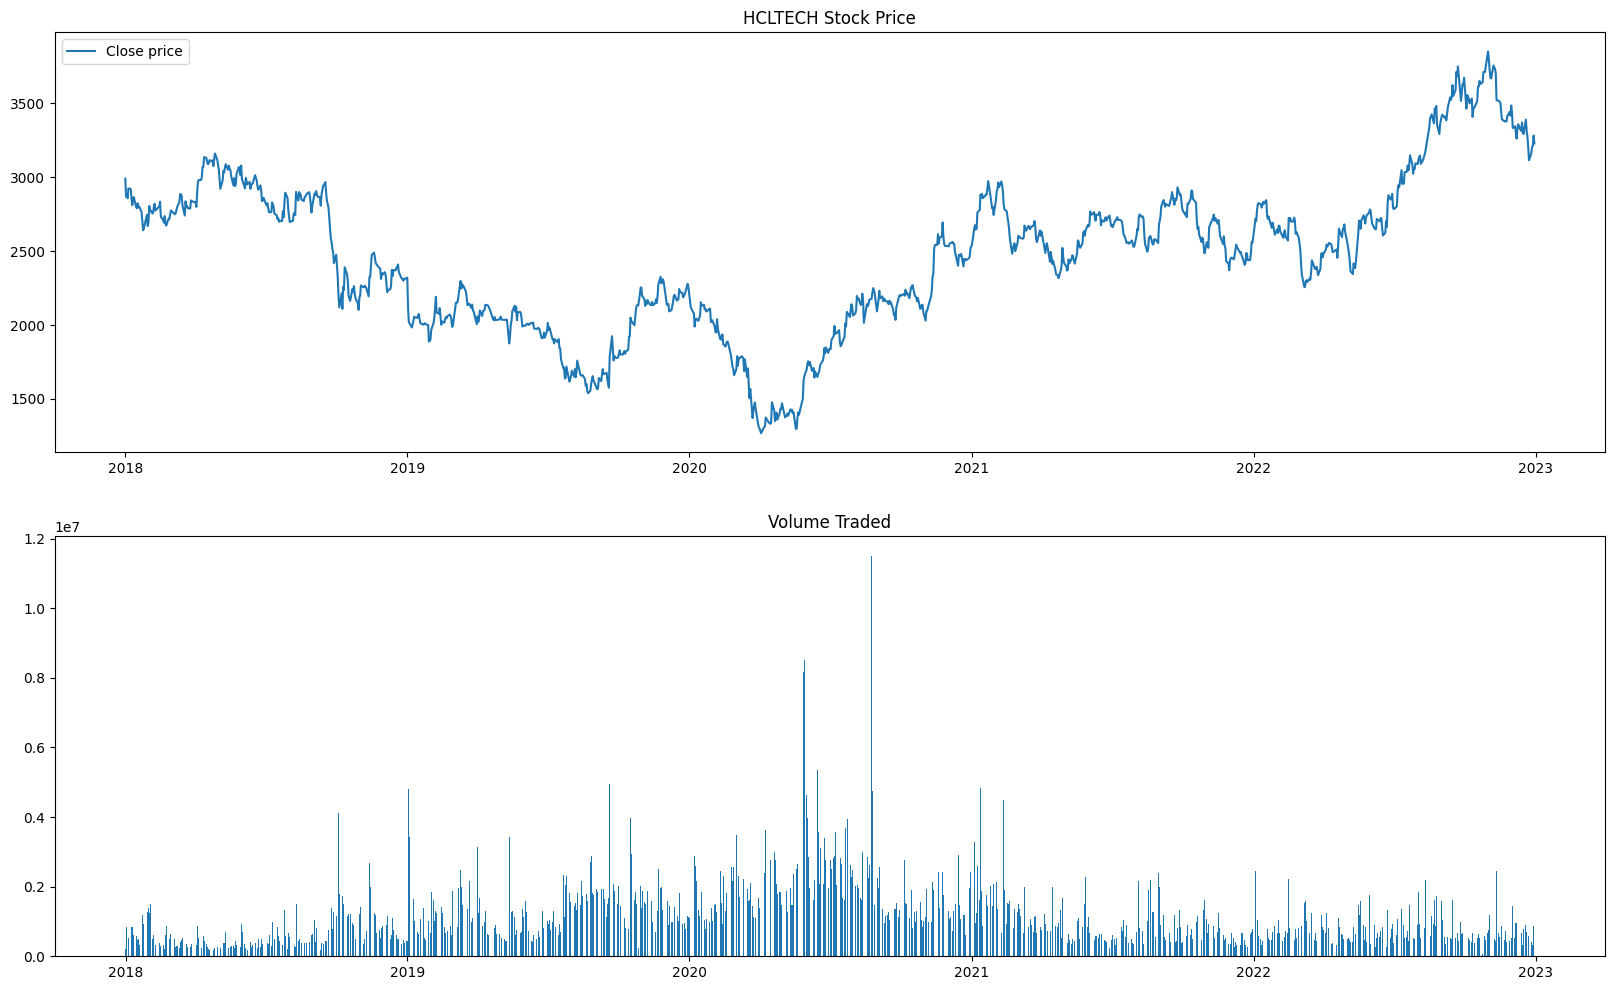

In [859]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('Eicher motor Stock Price')
plt.plot(df2.Close,label='Close price')
plt.legend()
plt.subplot(2, 1, 2)
plt.title('Volume Traded')
plt.bar(x=df2.index,height=df2['Volume'])
plt.show()


# ARIMA Model:-


In [860]:
data = list(df2["Close"])

In [861]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print("1. ADF : ",result[0])
print("2. P-Value : ", result[1])
print("3. Num Of Lags : ", result[2])
print("4. Num Of Observations Used For ADF Regression:", result[3])
print("5. Critical Values :")
for key, val in result[4].items():
  print("\t",key, ": ", val)

1. ADF :  -1.5542620462067818
2. P-Value :  0.5065185617938253
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 1235
5. Critical Values :
	 1% :  -3.4356560275160835
	 5% :  -2.8638831211270817
	 10% :  -2.568017509711682


In [862]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [863]:
from pmdarima.arima.utils import ndiffs
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


In [864]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [865]:
x_train= data[:-100]
x_test = data[-100:]
print(len(x_train),len(x_test))

1136 100


In [866]:
stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13182.202, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13174.649, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13176.621, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13176.633, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13172.667, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13178.486, Time=0.51 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.713 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1236
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -6585.334
Date:                Fri, 31 Mar 2023   AIC                          13172.667
Time:                        10:59:07   BIC                          13177.786
Sample:                             0   HQIC                         13174.593
    

In [867]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(4,2,0))

In [868]:
from statsmodels.tsa.arima.model import ARIMA
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1236
Model:                 ARIMA(4, 2, 0)   Log Likelihood               -6688.121
Date:                Fri, 31 Mar 2023   AIC                          13386.243
Time:                        10:59:07   BIC                          13411.833
Sample:                             0   HQIC                         13395.869
                               - 1236                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7992      0.025    -31.628      0.000      -0.849      -0.750
ar.L2         -0.5890      0.033    -18.009      0.000      -0.653      -0.525
ar.L3         -0.3944      0.030    -13.034      0.000      -0.454      -0.335
ar.L4         -0.2149      0.024     -8.988      0.000      -0.262      -0.168
sigma2      2977.0464     97.620     30.496      0.000    2785.714    3168.378
===================================================================================
Ljung-Box (L1) (Q):                   0.93   Jarque-Bera (JB):                54.76
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             0.06
Prob(H) (two-sided):                  0.78   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [869]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

array([3164.85655378, 3088.02485641, 3121.95998322, 3161.98409527,
       3185.62105395, 3221.67313186, 3387.70120088, 3455.05444507,
       3462.33022832, 3471.33925715, 3394.55770599, 3490.08975755,
       3462.61754397, 3496.22824794, 3338.59804082, 3277.56200047,
       3336.80478229, 3407.89985687, 3409.83343353, 3407.06087773,
       3433.74805714, 3389.39674884, 3428.88866688, 3483.44977176,
       3567.64347479, 3543.46903673, 3572.5726419 , 3661.26821243,
       3566.14823401, 3598.70380092, 3749.02508217, 3713.78662435,
       3771.21157904, 3715.25756185, 3501.90002869, 3539.1550946 ,
       3621.32493542, 3602.10221183, 3664.21257305, 3452.87828454,
       3550.53295723, 3512.96737238, 3477.6495102 , 3498.44300449,
       3399.19048088, 3437.76330273, 3459.19680252, 3475.82018373,
       3508.47294408, 3654.31233198, 3643.98373329, 3685.96094487,
       3658.89303285, 3667.53871189, 3729.77541816, 3731.98619464,
       3763.7607151 , 3893.83610073, 3831.7069673 , 3731.03481

In [870]:
s = pd.Series(pred, index =df2.index[-100:])
s

Data
2022-08-05    3164.856554
2022-08-08    3088.024856
2022-08-10    3121.959983
2022-08-11    3161.984095
2022-08-12    3185.621054
                 ...     
2022-12-26    3080.542942
2022-12-27    3114.883055
2022-12-28    3181.268518
2022-12-29    3200.266303
2022-12-30    3293.816472
Length: 100, dtype: float64

<Axes: xlabel='Data'>

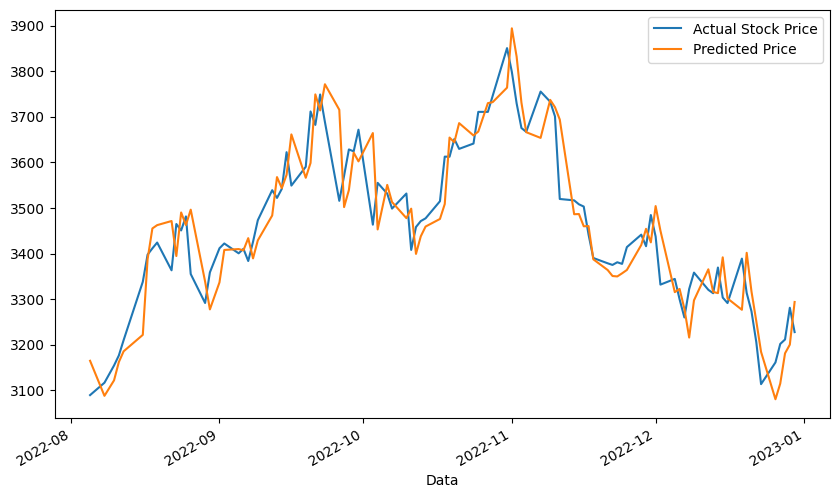

In [871]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-100:].plot(label='Actual Stock Price', legend=True)
s.plot(label='Predicted Price', legend=True,)

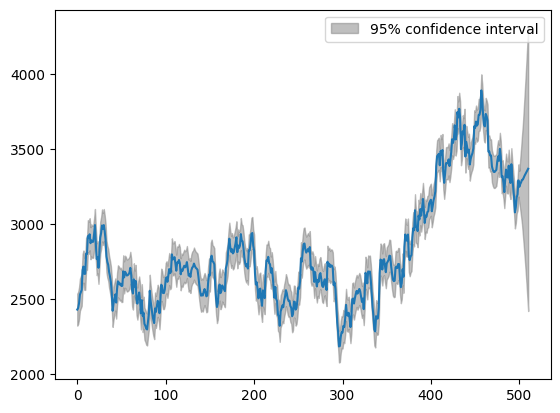

In [872]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model, start = len(data)-500, end = len(data)+10, dynamic = False);

In [873]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(x_test,pred))

68.11353737666668

In [874]:
from sklearn.metrics import r2_score
r2_score(x_test,pred)

0.8385232053685719

# Predicting Future 10 values:

In [875]:
pred_future = model.predict(start=end,end=end+30)
pred_future

array([3293.81647211, 3251.05993152, 3268.52308029, 3281.12746097,
       3297.23736252, 3299.21858069, 3313.59896296, 3326.05334251,
       3337.56312557, 3349.1080737 , 3359.27642973, 3371.31061937,
       3382.8535935 , 3394.22556718, 3405.58344803, 3416.84609319,
       3428.36614627, 3439.77888379, 3451.16636633, 3462.55618223,
       3473.94601872, 3485.36748585, 3496.76816952, 3508.16632341,
       3519.56626051, 3530.96766236, 3542.37230724, 3553.77333803,
       3565.17438613, 3576.5759552 , 3587.97782623])

In [876]:
import datetime
start_date = datetime.datetime(2022,12,30)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(31)]

In [877]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2022-12-30    3293.816472
2022-12-31    3251.059932
2023-01-01    3268.523080
2023-01-02    3281.127461
2023-01-03    3297.237363
2023-01-04    3299.218581
2023-01-05    3313.598963
2023-01-06    3326.053343
2023-01-07    3337.563126
2023-01-08    3349.108074
2023-01-09    3359.276430
2023-01-10    3371.310619
2023-01-11    3382.853594
2023-01-12    3394.225567
2023-01-13    3405.583448
2023-01-14    3416.846093
2023-01-15    3428.366146
2023-01-16    3439.778884
2023-01-17    3451.166366
2023-01-18    3462.556182
2023-01-19    3473.946019
2023-01-20    3485.367486
2023-01-21    3496.768170
2023-01-22    3508.166323
2023-01-23    3519.566261
2023-01-24    3530.967662
2023-01-25    3542.372307
2023-01-26    3553.773338
2023-01-27    3565.174386
2023-01-28    3576.575955
2023-01-29    3587.977826
dtype: float64

<Axes: xlabel='Data'>

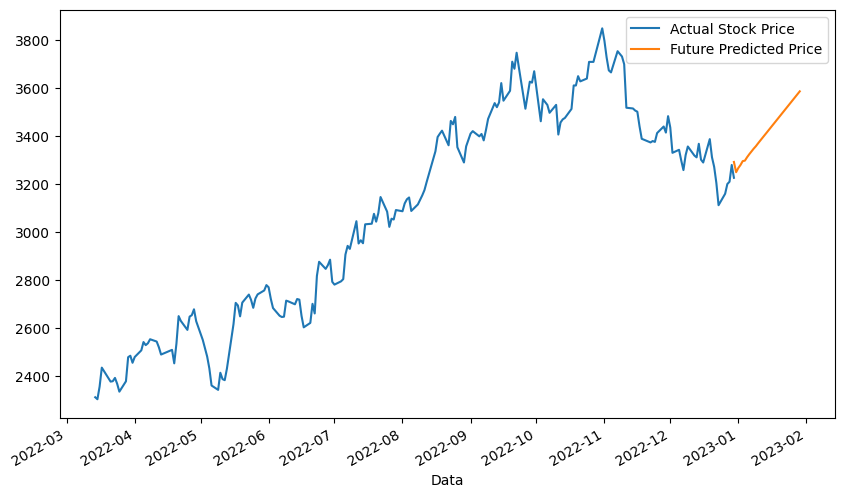

In [878]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-200:].plot(label='Actual Stock Price', legend=True)
pred_future2.plot(label='Future Predicted Price', legend=True)